In [2]:
import numpy as np
import pandas as pd
import math

from glob import glob
# import os

import matplotlib.pyplot as pl
from pylab import rcParams
%pylab inline

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller 

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Выберем регион около Empire State Building: 1231 - 3
test_region = 1231-3

In [4]:
# %%time
# df = pd.DataFrame()
# files = glob('aggr_yellow_tripdata_????-??.bin')
# for fname in files:
#     df_tmp = pd.read_pickle(fname)
#     df = df.append(df_tmp[df_tmp['region'] == test_region])
#     print(fname)
    
# print('finish') 

In [5]:
# df.to_pickle('aggr_yellow_tripdata_w3.bin')
df = pd.read_pickle('aggr_yellow_tripdata_w3.bin')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21167 entries, 483727 to 1858727
Data columns (total 3 columns):
datetime    21167 non-null datetime64[ns, UTC]
region      21167 non-null int64
count       21167 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 661.5 KB


In [7]:
df.head()

,datetime,region,count
483727,2014-01-01 00:00:00+00:00,1228,863.0
906227,2014-01-01 01:00:00+00:00,1228,866.0
486227,2014-01-01 02:00:00+00:00,1228,888.0
908727,2014-01-01 03:00:00+00:00,1228,815.0
911227,2014-01-01 04:00:00+00:00,1228,718.0


In [8]:
dmin, dmax = df.datetime.min(), df.datetime.max()
print('Рассматриваемый интервал: {:%d.%m.%Y %H:%M} - {:%d.%m.%Y %H:%M}'.format(dmin, dmax))
print('расчетное количество часов в интервале: {:n}'.format( (dmax - dmin).total_seconds() / 3600 ))
print('Количество записей в DataFrame        : {:n}'.format(len(df)))

Рассматриваемый интервал: 01.01.2014 00:00 - 31.05.2016 23:00
расчетное количество часов в интервале: 21167
Количество записей в DataFrame        : 21167


In [9]:
df_plot = df.set_index('datetime')

In [10]:
# df_plot.resample('M').mean().head

In [11]:
# Индекс имеет тип DatetimeIndex, а у класса DatetimeIndex есть переменная-член date
# Вырезаем данные за год.
s = df_plot.loc[(df_plot.index.date >= datetime.date(2015, 5, 1)) & 
                (df_plot.index.date < datetime.date(2016, 5, 1))]

In [12]:
s.head()

,region,count
datetime,,
2015-05-01 00:00:00+00:00,1228,677.0
2015-05-01 01:00:00+00:00,1228,452.0
2015-05-01 02:00:00+00:00,1228,338.0
2015-05-01 03:00:00+00:00,1228,224.0
2015-05-01 04:00:00+00:00,1228,217.0


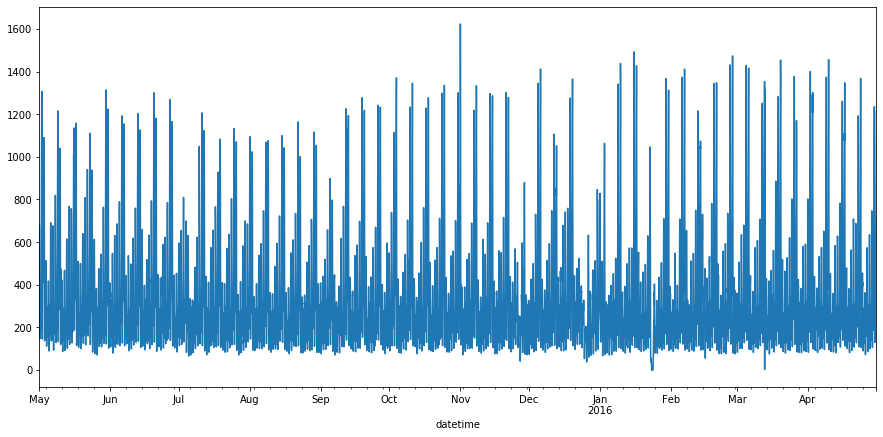

In [13]:
plt.figure(figsize(15,7))
# s['count'].plot()
stmp = s.resample('D').mean()
s['count'].plot();

Курс 5 - Прогнозирование временных рядов  
1-1.Prognozirovanie-vremennyh-ryadov.pdf


dminik5_w1_01

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

https://habr.com/ru/post/207160/

https://habr.com/ru/post/334220/

Основная сложность работы с такими рядами, как в нашем проекте, заключается в том, как учесть сложную структуру сезонности — суточной, недельной и годовой. В рамках моделей ARIMA можно учесть только одну из них. Обычно в таких случаях **сезонность с самым маленьким периодом явно моделируют с помощью аримы, а все остальные учитывают за счёт регрессионной компоненты.**

In [13]:
s_diff = s['count'].diff()

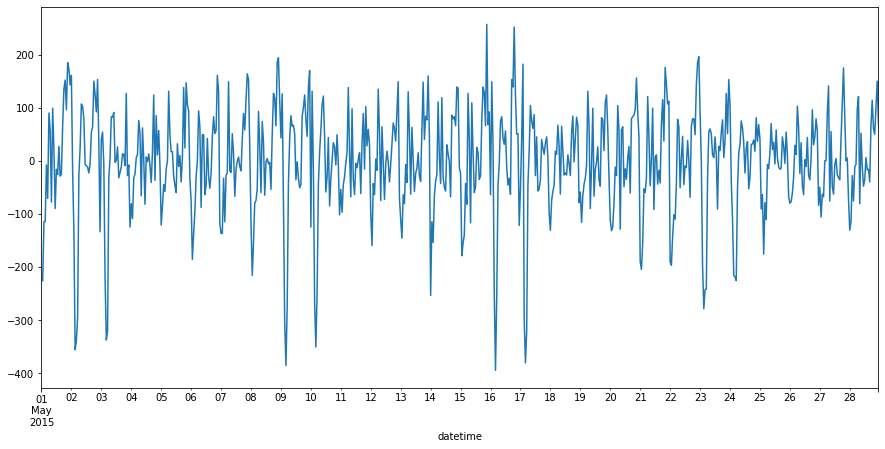

In [14]:
# s_diff.resample('D').mean().head(100).plot();
s_diff.head(28*24).plot();

In [53]:
# stmp = s_diff.head(28*24)
stmp = s.head(28*24)['count']

In [54]:
stmp.head()

datetime
2015-05-01 00:00:00+00:00    677.0
2015-05-01 01:00:00+00:00    452.0
2015-05-01 02:00:00+00:00    338.0
2015-05-01 03:00:00+00:00    224.0
2015-05-01 04:00:00+00:00    217.0
Name: count, dtype: float64

In [18]:
stmp.index.date

array([datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 1), datetime.date(2015, 5, 1),
       datetime.date(2015, 5, 2), datetime.date(2015, 5, 2),
       datetime.date(2015, 5, 2), datetime.date(2015, 5, 2),
       datetime.date(2015, 5, 2), datetime.date(2015, 5, 2),
       datetime.date(2015, 5, 2), datetime.date(2015, 5, 2),
       datetime.date(201

In [32]:
len(stmp)

672

In [27]:
# X_week = []
# ibeg = 0
# for k in range(2, 6):
#     X_week.append([ math.sin(i* 2.*math.pi*k/168) for i in range(ibeg, len(stmp) + ibeg)])
#     X_week.append([ math.cos(i* 2.*math.pi*k/168) for i in range(ibeg, len(stmp) + ibeg)])
s_mean.head()  

,region,count,tmp
datetime,,,
2015-05-01 00:00:00+00:00,1228,400.541667,382.09896
2015-05-02 00:00:00+00:00,1228,636.333333,595.84896
2015-05-03 00:00:00+00:00,1228,464.458333,438.59896
2015-05-04 00:00:00+00:00,1228,229.083333,236.09896
2015-05-05 00:00:00+00:00,1228,281.083333,273.59896


0.9339653382339046


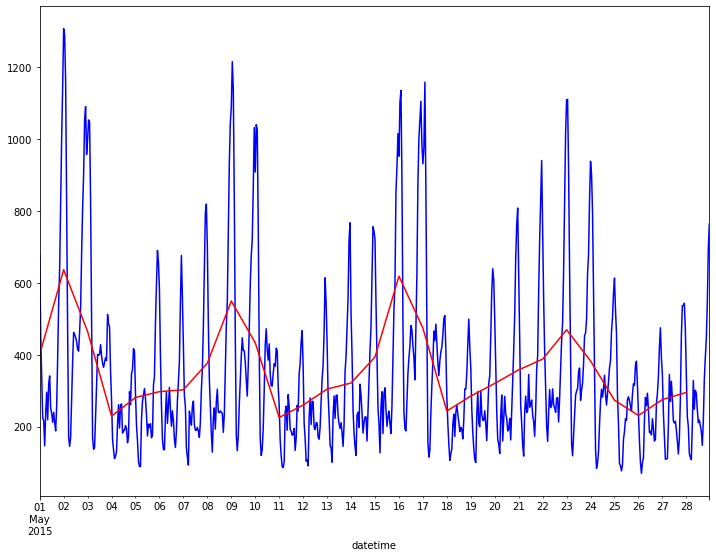

In [77]:
# Попробуем так: вычислим коэффициенты для значенией, усредненных за день, а потом по ним 
# рассчитаем и отобразим все значения.

rcParams['figure.figsize'] = 12, 9


stmp = s.head(4*7*24).copy()
s_mean = stmp.resample('D').mean()

t_period = 7

# можно для начала взять K равным 2-5
Kmax = 5
# for Kmax in range(2, 20):
X_week = []
for i in range(0, len(s_mean)):
    X_week.append([ math.sin(i* 2.*math.pi*k/t_period) for k in range(1, Kmax+1)] + 
                  [ math.cos(i* 2.*math.pi*k/t_period) for k in range(1, Kmax+1)])

lr = LinearRegression()
lr.fit( X_week , s_mean['count'].values)
score  = lr.score(X_week , s_mean['count'].values)
print(score)



# t_period = 7*24
# X_week_pred = []
# for i in range(0, len(stmp)):
#     X_week_pred.append([ math.sin(i* 2.*math.pi*k/t_period) for k in range(1, Kmax+1)] + 
#                        [ math.cos(i* 2.*math.pi*k/t_period) for k in range(1, Kmax+1)])

# stmp['tmp']  = lr.predict(X_week_pred)
s_mean['tmp'] = lr.predict(X_week)


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)

stmp['count'].plot(ax=ax, color='b')
s_mean['count'].plot(ax=ax, color='r')

# stmp['tmp'] = y_test
# stmp['delta'] = stmp['count'] - stmp['tmp']
# stmp[['count',  'tmp', 'delta']].plot()
#     stmp['delta'].plot()
#     pl.plot(y_test)
#     pl.plot(stmp.values)
#     pl.set
# print(l_score)
# rcParams['figure.figsize'] = 12, 9
# decomp=seasonal_decompose(stmp['delta'] )
# decomp.plot()
pl.show();

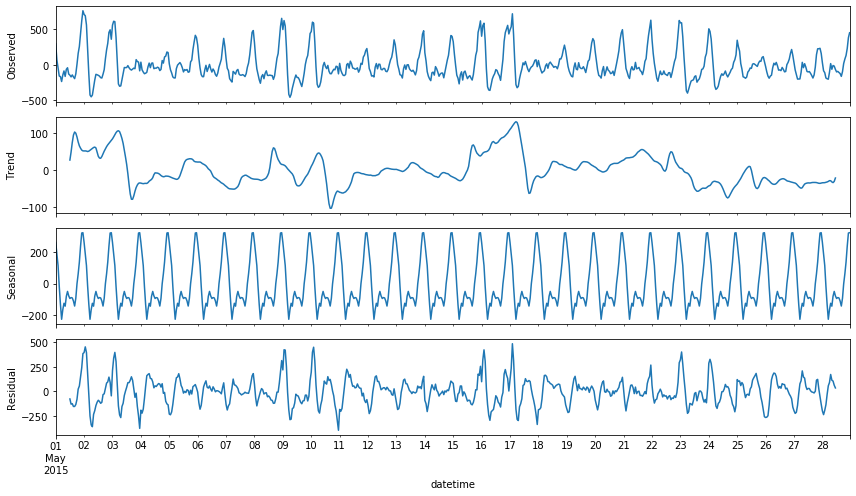

In [84]:
from datetime import datetime
rcParams['figure.figsize'] = 12, 7
stmp['ddd'] = stmp.index
stmp['mean'] = stmp.apply(lambda row: s_mean.loc[datetime(year=row.ddd.year, month=row.ddd.month,
                    day=row.ddd.day, hour=0, second=0)]['tmp'] , axis=1)
stmp['delta'] = stmp['count'] - stmp['mean']

# stmp[['count',  'delta']].plot()

# stmp['delta'] = np.log(stmp['delta'])
# stmp.head()
decomp=seasonal_decompose(stmp['delta'])
decomp.plot();

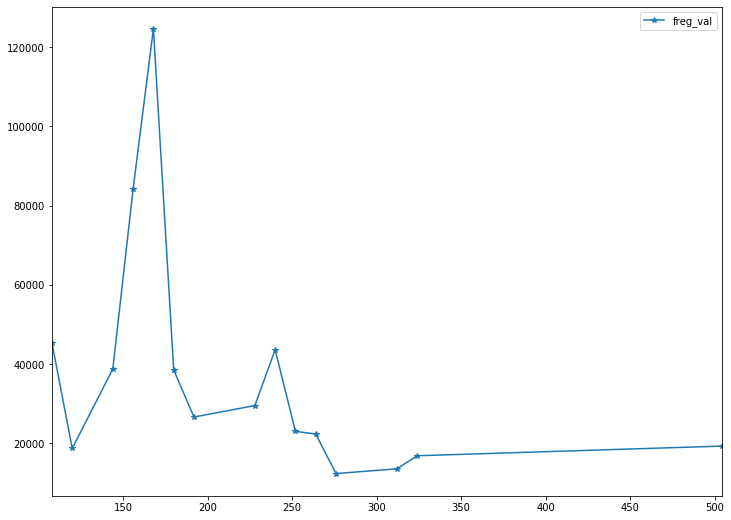

In [84]:
def fft_freg( df, nRet=10, fregMin = 0 ):
    
    N = df.shape[0] // 2
    Y = np.fft.fft(df['count'].values) # fft computing and normalization
    df_fft = pd.DataFrame(np.abs(Y[:N]), columns=['freg_val'])
#     return df_fft[df_fft.freg_val > 100000]
    df_fft.sort_values(by='freg_val', ascending=False, inplace=True)
    return df_fft[df_fft.index > fregMin].head(nRet)
# Y = Y[range(n/2)]
# T = 12*7*24 
#     xf = np.linspace(0.0, T/24., 1.)
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(t,y)
# ax[0].set_xlabel('Time')
# ax[0].set_ylabel('Amplitude')
# plt.plot(abs(Y),'r'); # plotting the spectrum
# ax[1].set_xlabel('Freq (Hz)')
# ax[1].set_ylabel('|Y(freq)|')
# fig, ax = plt.subplots()
# ax.plot(2.0/N * np.abs(Y[:T]))
# plt.show()
df_plot = fft_freg(stmp, 15, 100)
df_plot.sort_index().plot(style='*-')

Используемые частоты: [168, 156, 108, 240, 144, 180, 228, 192, 252, 264, 504, 120, 324, 312, 276, 356]
[0.2323164319593113]
Test Statistic                -7.634999e+00
p-value                        1.963081e-11
#Lags Used                     4.800000e+01
Number of observations Used    1.967000e+03
dtype: float64


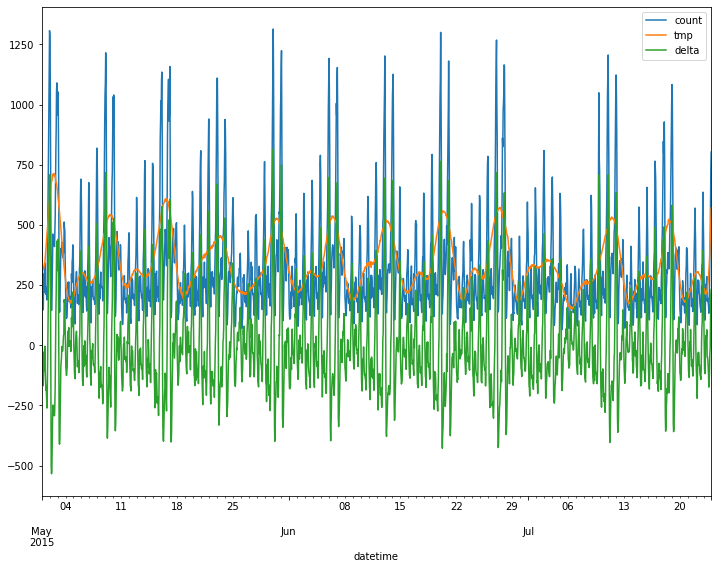

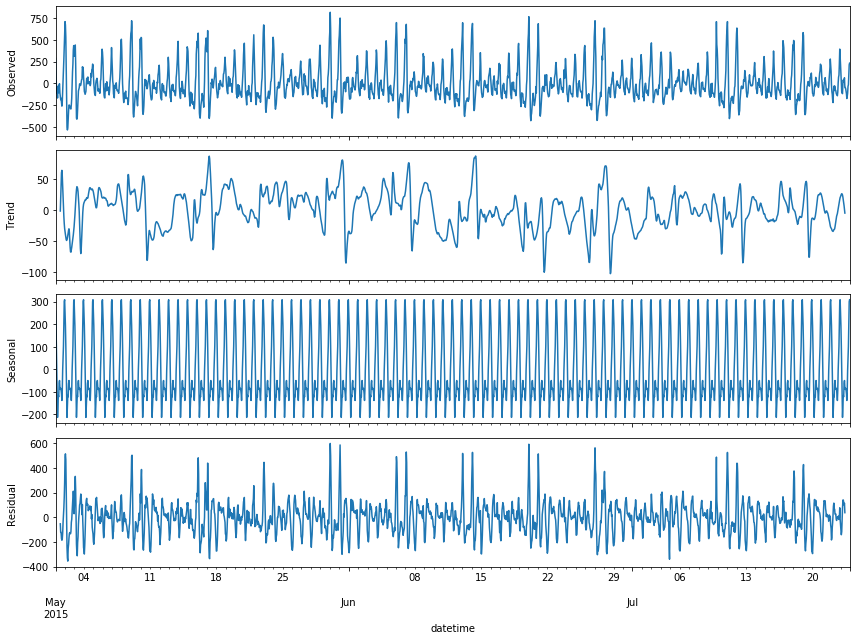

In [85]:
# pl.figure(figsize=(12,8))
rcParams['figure.figsize'] = 12, 9
stmp = s.head(12*7*24).copy()
stmp = stmp.dropna()
df_freg = fft_freg(stmp, 15, 100)
# stmp['count'] = np.log( stmp['count'].values )

# stmp = s.head(12*28*24).resample('D').mean().copy()
# t_period = 7*24 # = 168 
# t_period2 = 12 # 365
# t_period3 = 84 #4*7*24
# t_period4 = 1848 #4*7*24
l_score = []
# можно для начала взять K равным 2-5
Kmax = 2 
# for Kmax in range(2, 20):

X_week = []
lfregs = df_freg.index.values.tolist()
for i in [7*24, 356]:
    if i not in lfregs:
        lfregs += [i]
print('Используемые частоты:', lfregs)

for i in range(0, len(stmp)):
    lfreg = []
    for freg in lfregs:
        lfreg += [ math.sin(i* 2.*math.pi*k/freg) for k in range(1, Kmax+1)] + [ math.cos(i* 2.*math.pi*k/freg) for k in range(1, Kmax+1)]
         
    X_week.append(lfreg)

lr = LinearRegression()
lr.fit( X_week , stmp['count'].values)
l_score.append(lr.score(X_week , stmp['count'].values))
y_test = lr.predict(X_week)

stmp['tmp'] = y_test
stmp['delta'] = stmp['count'] - stmp['tmp']
stmp[['count',  'tmp', 'delta']].plot()
#     stmp['delta'].plot()
#     pl.plot(y_test)
#     pl.plot(stmp.values)
#     pl.set
print(l_score)
dftest =  adfuller(stmp['delta'], autolag=None, maxlag=24*2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of observations Used'])
print (dfoutput)
rcParams['figure.figsize'] = 12, 9
decomp=seasonal_decompose(stmp['delta'] )
decomp.plot()
pl.show();

In [23]:
# stmp['count'].rolling(window=24*7).mean().plot();
adfuller(stmp['delta'])

(-8.220863328292603,
 6.435387233747604e-13,
 16,
 655,
 {'1%': -3.4403730727154724,
  '5%': -2.86596268312982,
  '10%': -2.569125249694074},
 7181.033553574586)

Проверка стационарности выполняетс по критерию Дики-Фуллера, с проверкой гипотезы
𝐻0:  ряд нестационарен

Test Statistic                  -3.870373
p-value                          0.002264
#Lags Used                      48.000000
Number of observations Used    623.000000
dtype: float64


[1.3902030415210157e-05,
 0.002264031864085891,
 0.13054346174883197,
 0.26508642728083914,
 0.4857482236165794,
 0.5805288125783084,
 0.1931073115809146,
 0.0786003371999034,
 0.12267061300760818]

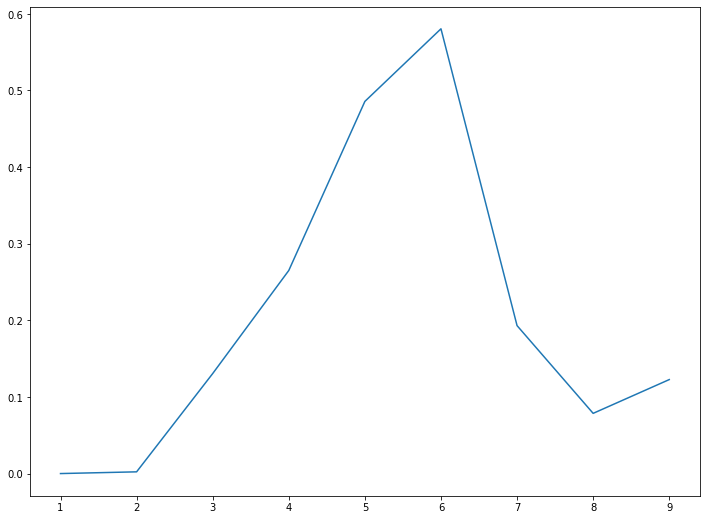

In [45]:
# print("Критерий Дики-Фуллера: p=%f" % adfuller(stmp['delta'])[1])
lout = []
for i in range(1, 10):
    dftest =  adfuller(stmp['delta'], autolag=None, maxlag=24*i)
    lout.append(dftest[1])
    

dftest =  adfuller(stmp['delta'], autolag=None, maxlag=24*2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of observations Used'])
print (dfoutput)
plt.plot(range(1, 10), lout)
lout

Значение p < 0.05 означает, что критерий Дики-Фуллера отвергает гипотезу нестационарности

Из учебного задания:  
Критерий Дики-Фуллера p=0.991850 не позволяет отклонить гипотезу  𝐻0:  ряд нестационарен на уровне 0.05.
Кроме того, о нестационарности ряда говорит четко выраженный тренд и наличие в ряде монотонно по времени изменяющейся дисперсии.

Применяем преобразование, преобразование Бокса-Кокса для стабилизации дисперсии:

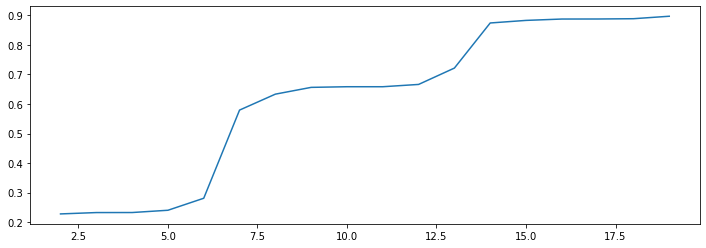

In [72]:
pl.figure(figsize=(12,4))
pl.plot(range(2, 20), l_score);

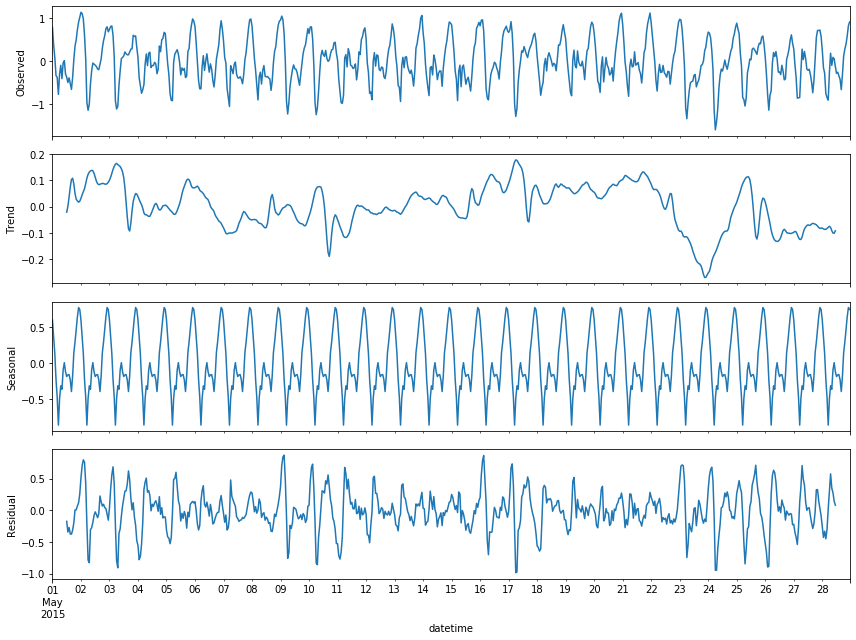

In [84]:
# stmp = s.head(28*24).copy()
# stmp.head()
# pl.figure(figsize=(12,4))
# plt.plot(X_week)

In [ ]:
print(lr.coef_)
rcParams['figure.figsize'] = 12, 4
aX = np.array(X_week)
aOut = np.zeros(aX.shape[0])
for i, a in enumerate(lr.coef_):
#     if abs(a) > 16.:
    aOut += a* aX[:, i]

plt.plot(aOut);

In [85]:
print(min(l_score))
print(max(l_score))

0.5656068854233149
0.5656068854233149


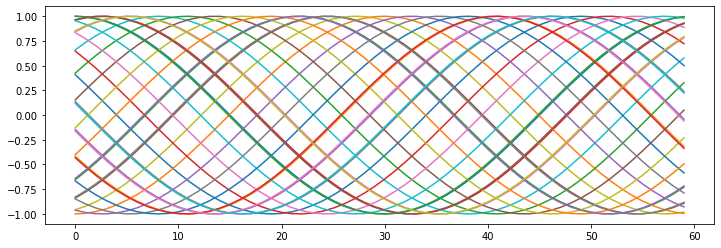

In [24]:
pl.figure(figsize=(12,4))
t_period = 10*6
ibeg = 80
for theta in range(0, t_period, 2):
    tmp = [math.cos(2*math.pi*i/t_period + theta)  for i in range(0, t_period)]
    plt.plot(tmp)
    # tmp1 = [math.sin(4*math.pi*i/t_period) + 1*math.cos(4*math.pi*i/t_period) for i in range(ibeg, t_period+ibeg)]
# 
# plt.plot(tmp)
# plt.plot(tmp1);

In [47]:
lr = LinearRegression(multioutput='uniform_average')
lr.fit( X_week , stmp.values)

TypeError: __init__() got an unexpected keyword argument 'multioutput'

In [38]:
lr.coef_

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [ 16.65621642, -23.33659136,  12.80854311, -23.88313916,
        -75.23661285,   6.24595665,  -1.69877779, -35.07986357]])

In [39]:
lr.intercept_ 

array([1228.        ,  329.05927156])

In [41]:
lr.score(X_week , stmp.values)

/home/adm-net/anaconda2/envs/py37/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.0728638518079836